---
---
## Coursework 1 - Discrete Probability
---

Simulate two random variables $X_1$ and $X_2$ following Poisson distributions with parameters $\mu_1$=1 and$\mu_2$=2 respectively. Calculate the variable $Y=X_1+ X_2$. Repeat the simulation 1000 times. Plot the distribution of variableY and compare it with an appropriate probability distribution.



First, repeat the experiment 1000 times and calculate the 1000 values taken by the variable Y. Considering that it follows a Poisson distribution with mean $\mu_Y=\mu_1+\mu_2$


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng(seed=6870)

# Parámetros mu1 y mu2 las distribuciones de Poisson segun el enunciado
mu1 = 1
mu2 = 2

# Num de repeticiones
num_simulaciones = 1000

####################################
# Voy a probar distintos caminos/casos: 
#######################################

#######################################
#CASO 1:
#simulo Poisson con vectorizacion
#######################################

X1 = poisson.rvs(mu=mu1, size=num_simulaciones, random_state=rng)
X2 = poisson.rvs(mu=mu2, size=num_simulaciones, random_state=rng)
Y_var=X1+X2

# Calculo algunas cosas:
media_Y = np.mean(Y_var)
varianza_Y = np.var(Y_var)
print('Caso 1:')
print("Media:", media_Y)
print("Varianza:", varianza_Y)

#######################################
# CASO 2: 
# Hago loop y lista (es menos eficiente, pero me sirve para entender mejor que esta pasando y 
#luego mirar el histograma)
#######################################

# Creo lista vacia para guardar los resultados de Y
resultados_Y = []

# repito la simulacion 1000 veces en un loop
for _ in range(num_simulaciones):
    # X1 y X2 siguen dist poisson: uso numpy.random.poisson
    X1 = np.random.poisson(mu1)
    X2 = np.random.poisson(mu2)
    
    # calculo Y = X1 + X2
    Y = X1 + X2

    # "Appendeo" los valores de Y en la lista
    resultados_Y.append(Y)

# Calculo algunas cosas:
media_Y = np.mean(resultados_Y)
varianza_Y = np.var(resultados_Y)
print('Caso 2:')
print("Media:", media_Y)
print("Varianza:", varianza_Y)

Caso 1:
Media: 2.967
Varianza: 2.885911
Caso 2:
Media: 3.095
Varianza: 3.3259750000000006


Hago plot comparando el Caso 1 y Caso 2 de arriba con una distribucion de Poisson con media $\mu_Y=\mu_1+\mu_2$:

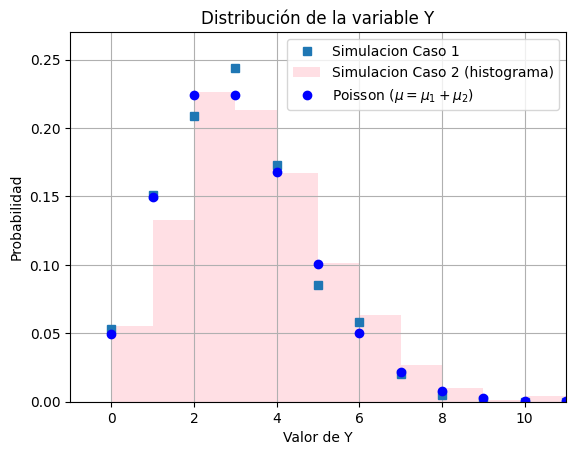

In [36]:

### 
# Caso 1: Genere Y_var sumando dos distribuciones de Poisson
frequency = np.bincount(Y_var) 
relative_frequency = frequency / num_simulaciones
# Array with PMF values with the same size as the frequency data 
k_max = relative_frequency.size
k = np.arange(k_max)
#ploteo la frecuncia relativa obtenida en la simulacion MC.
plt.plot(k, relative_frequency, ls='None', marker='s', label="Simulacion Caso 1")
### 


### 
# Caso 2: Genere un lista "resultados_Y" sumando X1 con X2 en cada una de las 1000 repeticiones. 
#Hago histograma de la lista para verlo graficamente
plt.hist(resultados_Y, bins=range(max(resultados_Y)+1), density=True, alpha=0.5, color='pink', label='Simulacion Caso 2 (histograma)')
### 



### 
#Comparo con una distribución de probabilidad adecuada (Poisson de media mu1+mu2)
muY = mu1+mu2  # Media de la distribucion de Y
fmp = poisson.pmf(k,muY)
plt.plot(k, fmp, ls='', marker='o', c='b', label=r'Poisson ($\mu=\mu_1+\mu_2$)')



plt.title('Distribución de la variable Y')
plt.xlabel('Valor de Y')
plt.ylabel('Probabilidad')
plt.xlim(-1,11)
plt.ylim(0,0.27)
plt.legend()
plt.grid(True)

Los resultados acuerdan. Si aumento el numero de simulaciones (por ejemplo a 10000), los 3 casos convergen.  